<a href="https://colab.research.google.com/github/Nishin-10/Nishin-10/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = 'marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')

# Inspect the data
print(df.head())
df.info()


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [5]:
import numpy as np

# --- 1. Handle Missing Data ---
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

# --- 2. Feature Engineering ---
current_year = 2025 # Using a fixed year for calculation
df['Age'] = current_year - df['Year_Birth']
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['Total_Spend'] = df[mnt_cols].sum(axis=1)
df['Total_Dependents'] = df['Kidhome'] + df['Teenhome']

features_for_clustering = ['Age', 'Income', 'Total_Spend', 'Total_Dependents']
df_cluster = df[features_for_clustering]

print(df_cluster.head())

   Age   Income  Total_Spend  Total_Dependents
0   68  58138.0         1617                 0
1   71  46344.0           27                 2
2   60  71613.0          776                 0
3   41  26646.0           53                 1
4   44  58293.0          422                 1


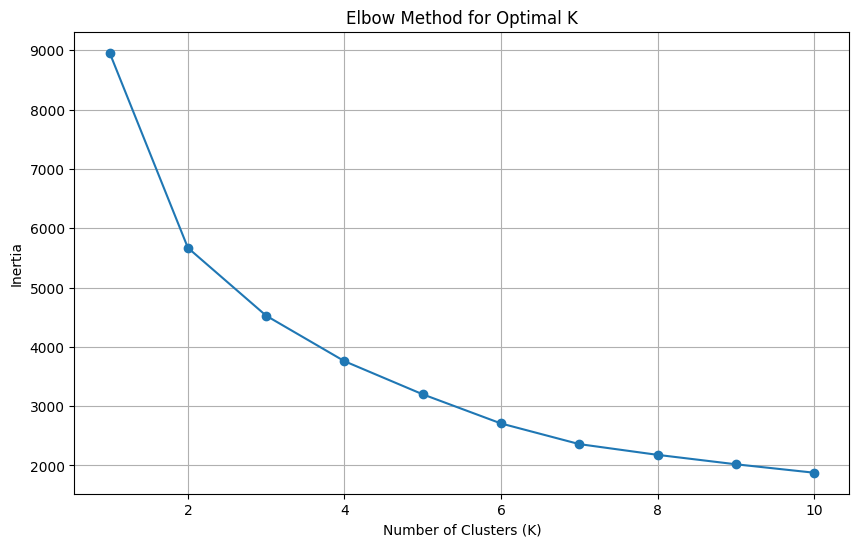

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cluster)

# Run the Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.savefig('elbow_plot.png')

In [7]:
import seaborn as sns

# --- 1. Run K-Means with K=4 ---
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(data_scaled)

df_cluster['Cluster'] = kmeans.labels_

cluster_analysis = df_cluster.groupby('Cluster').mean()
print("--- Cluster Analysis (Mean Values) ---")
print(cluster_analysis)

--- Cluster Analysis (Mean Values) ---
               Age        Income  Total_Spend  Total_Dependents
Cluster                                                        
0        47.743836  33825.669178   167.691781          0.854795
1        59.557734  44045.274510   222.442266          2.115468
2        51.892216  78137.905190  1437.325349          0.283433
3        68.521818  59920.827273   749.767273          0.712727


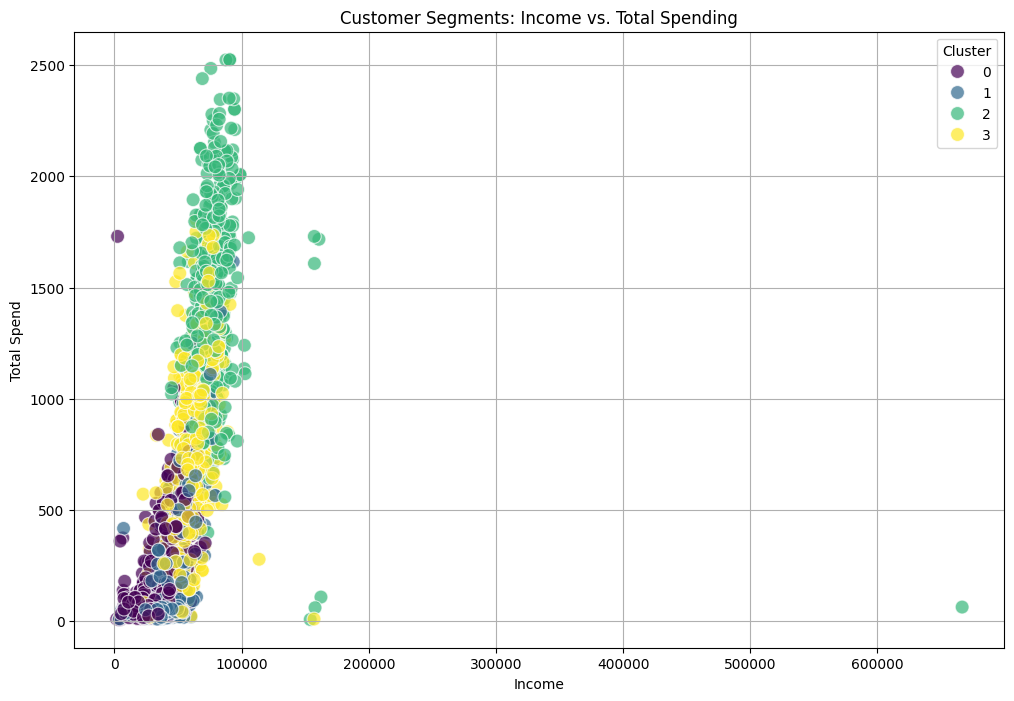

In [8]:

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_cluster,
    x='Income',
    y='Total_Spend',
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7
)
plt.title('Customer Segments: Income vs. Total Spending')
plt.xlabel('Income')
plt.ylabel('Total Spend')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('customer_segments_plot.png')